In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the data
df = pd.read_excel("/content/drive/MyDrive/Data/Wine_quality_data/1613779-Red_wine_.xlsx")

Exploring the data using descriptive statistics:

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [ ]:
# Step 3: Checking for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


In [ ]:
# Step 4: Fill in missing values using mean imputation
df = df.fillna(df.mean())

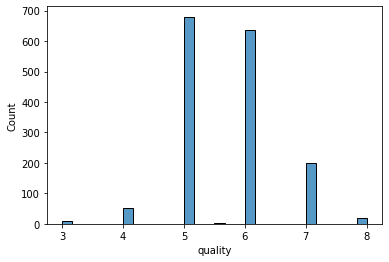

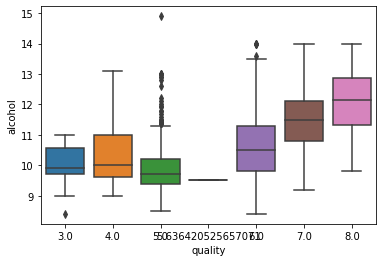

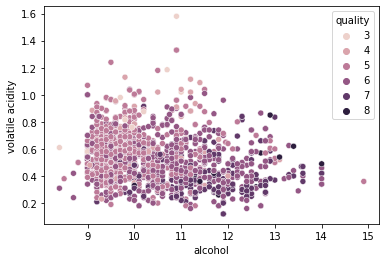

In [ ]:
sns.histplot(df['quality'])
plt.show()

sns.boxplot(x='quality', y='alcohol', data=df)
plt.show()

sns.scatterplot(x='alcohol', y='volatile acidity', hue='quality', data=df)
plt.show()

In [ ]:
# Step 6: Preprocessing the data by standardizing the input features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])
y = df.iloc[:, -1]

In [ ]:
# Step 7: Spliting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 8: Building and training a linear regression model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 9: Evaluating the performance of the linear regression model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

MSE: 0.3901169098227423
R-squared: 0.4017028755684948


In [ ]:
# Step 10: Fine-tuning the hyperparameters of the linear regression model using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_regressor = grid_search.best_estimator_
print('Best parameters:', grid_search.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please 

In [ ]:
# Step 11: Evaluating the performance of the tuned linear regression model
y_pred_tuned = best_regressor.predict(X_test)

print('Tuned MSE:', mean_squared_error(y_test, y_pred_tuned))
print('Tuned R-squared:', r2_score(y_test, y_pred_tuned))

Tuned MSE: 0.3901169098227423
Tuned R-squared: 0.4017028755684948


In [ ]:
# Step 12: Using the best model to make predictions on new data
new_data = [[7.5, 0.6, 0.3, 3.0, 0.08, 20, 70, 0.998, 3.5, 0.8, 10.5]]
new_data = scaler.transform(new_data)

predicted_quality = best_regressor.predict(new_data)
print('Predicted quality:', predicted_quality)

Predicted quality: [5.56785691]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
